In [159]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm, skew 
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [160]:
df=pd.read_excel(r'C:\Users\DELL\Downloads\Train_Forecasting_dataN.xlsx')
df.head()

,date,store,item,sales
0,2013-01-01,1,frappe,33
1,2013-01-02,1,frappe,43
2,2013-01-03,1,frappe,23
3,2013-01-04,1,frappe,18
4,2013-01-05,1,frappe,34


In [161]:
df.tail()

,date,store,item,sales
200855,2017-12-27,10,popsicle,65
200856,2017-12-28,10,popsicle,73
200857,2017-12-29,10,popsicle,103
200858,2017-12-30,10,popsicle,76
200859,2017-12-31,10,popsicle,94


In [162]:
df.shape

(200860, 4)

In [163]:
df.dtypes

date     datetime64[ns]
store             int64
item             object
sales             int64
dtype: object

In [164]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

<AxesSubplot:xlabel='sales', ylabel='Count'>

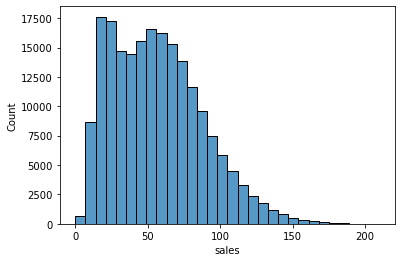

In [165]:
sns.histplot(df, x="sales", bins=30)

Univariate Analysis

In [166]:
df['item'].value_counts().sort_values(ascending = False)

frappe                  18260
plum_pudding            18260
tipsy_cake              18260
icebox_cake             18260
soft_ice_cream          18260
trifle                  18260
lollipop                18260
strawberry_ice_cream    18260
Neapolitan_ice_cream    18260
chocolate_pudding       18260
popsicle                18260
Name: item, dtype: int64

In [167]:
df1 = df[['date', 'sales']]
df1.head()

,date,sales
0,2013-01-01,33
1,2013-01-02,43
2,2013-01-03,23
3,2013-01-04,18
4,2013-01-05,34


In [168]:
df.groupby('item').sum().sort_values('sales', ascending = False)

,store,sales
item,,
strawberry_ice_cream,100430,1604713
trifle,100430,1539621
popsicle,100430,1470330
chocolate_pudding,100430,1201541
Neapolitan_ice_cream,100430,1070845
frappe,100430,1069564
soft_ice_cream,100430,1068777
icebox_cake,100430,1068281
lollipop,100430,468480


In [169]:
df1['date']=pd.to_datetime(df1['date'])

C:\Users\DELL\AppData\Local\Temp/ipykernel_7796/3454300950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=pd.to_datetime(df1['date'])


In [170]:
df1.set_index('date',inplace=True)

In [171]:
df1.head(13)

,sales
date,
2013-01-01,33
2013-01-02,43
2013-01-03,23
2013-01-04,18
2013-01-05,34
2013-01-06,38
2013-01-07,27
2013-01-08,28
2013-01-09,34


In [172]:
df.head()

,date,store,item,sales
0,2013-01-01,1,frappe,33
1,2013-01-02,1,frappe,43
2,2013-01-03,1,frappe,23
3,2013-01-04,1,frappe,18
4,2013-01-05,1,frappe,34


In [173]:
res=df
res['item']=res['item'].astype('category')
clist=list(res['item'].cat.categories)
clist

['Neapolitan_ice_cream',
 'chocolate_pudding',
 'frappe',
 'icebox_cake',
 'lollipop',
 'plum_pudding',
 'popsicle',
 'soft_ice_cream',
 'strawberry_ice_cream',
 'tipsy_cake',
 'trifle']

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200860 entries, 0 to 200859
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    200860 non-null  datetime64[ns]
 1   store   200860 non-null  int64         
 2   item    200860 non-null  category      
 3   sales   200860 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.8 MB


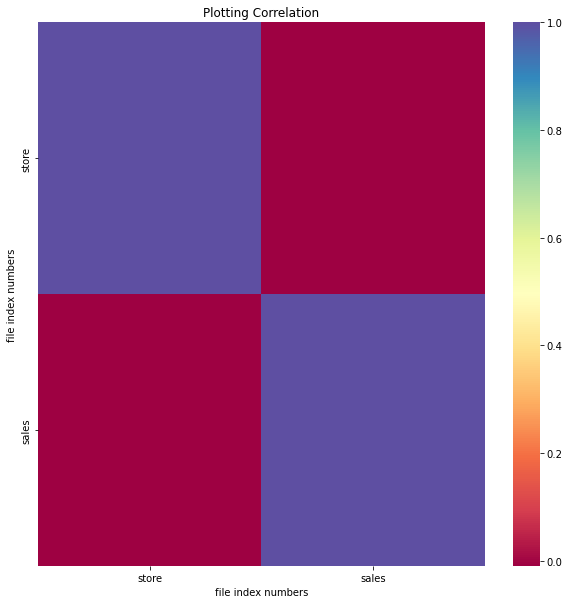

In [175]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Spectral')
plt.ylabel('file index numbers')
plt.xlabel('file index numbers')
plt.title('Plotting Correlation')
plt.show()

<AxesSubplot:xlabel='store', ylabel='sales'>

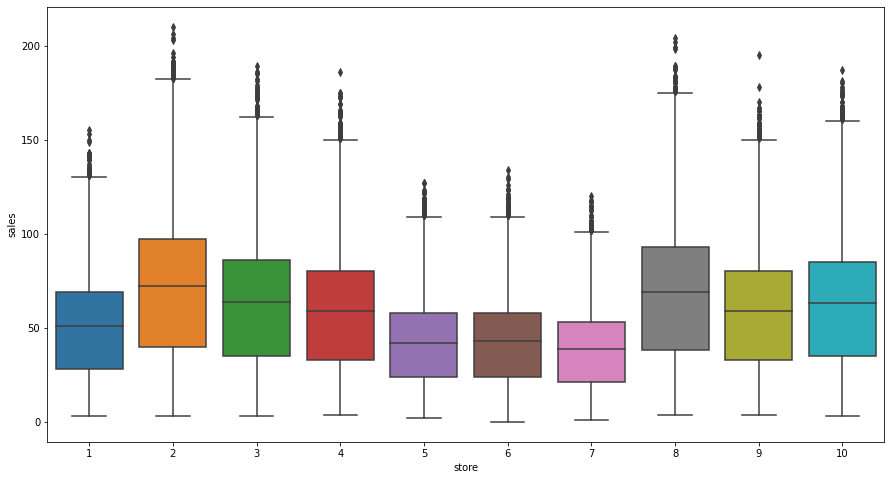

In [176]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x = 'store', y = 'sales', data = df)

<AxesSubplot:xlabel='sales', ylabel='item'>

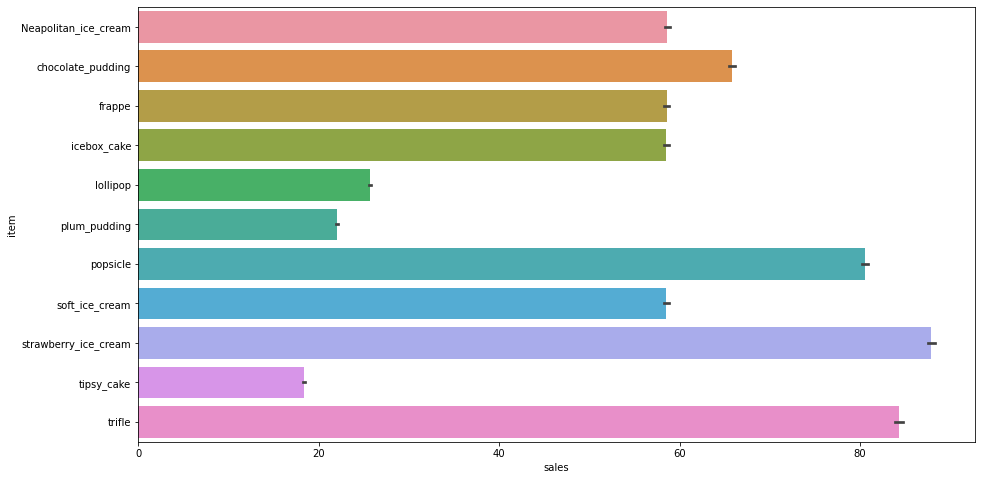

In [177]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x = 'sales', y = 'item', data = df,orient = 'h')

In [178]:
results=df[df.item.isin(['icebox_cake', 'tipsy_cake','chocolate_pudding','plum_pudding'])]
results.head()

,date,store,item,sales
18260,2013-01-01,1,plum_pudding,10
18261,2013-01-02,1,plum_pudding,11
18262,2013-01-03,1,plum_pudding,8
18263,2013-01-04,1,plum_pudding,19
18264,2013-01-05,1,plum_pudding,12


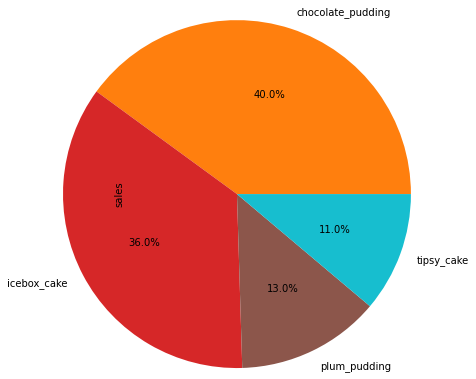

In [179]:
#sales of cake items
results.groupby('item').sum().plot(kind='pie',y="sales",radius=2.0,legend=None,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
plt.show()

In [180]:
df['date']=pd.to_datetime(df['date'])

In [181]:
df.set_index('date',inplace=True)

In [182]:
#Monthly Sampling

In [183]:
monthly=df.resample('M').sum()
monthly.drop(['store'], axis=1,inplace=True)
monthly.head(13)

,sales
date,
2013-01-31,107222
2013-02-28,109168
2013-03-31,146662
2013-04-30,161233
2013-05-31,181335
2013-06-30,188881
2013-07-31,202341
2013-08-31,182062
2013-09-30,163216


In [184]:
monthly.shape

(60, 1)

<AxesSubplot:xlabel='date'>

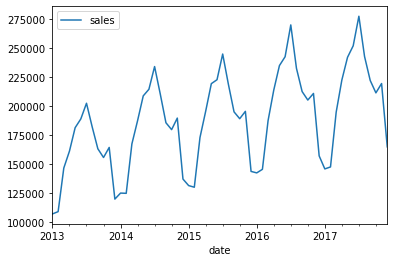

In [185]:
monthly.plot()

In [186]:
dc = sm.tsa.seasonal_decompose(monthly, model='additive')

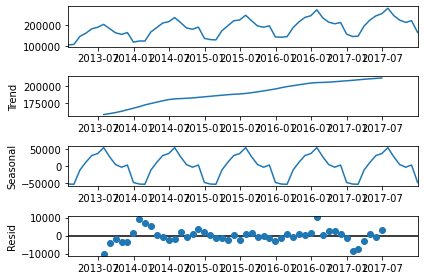

In [187]:
fig = dc.plot()

In [188]:
from statsmodels.tsa.stattools import adfuller

In [189]:
def adt(s):
    r=adfuller(s)
    l=['ADF test','p-value','#lags used','no. of observations used']
    for v,la in zip(r,l):
        print(la,'->',str(v))
    print()
    if r[1]<=0.05:
        print('stationary')
    else:
        print('not stationary')

In [190]:
adt(monthly['sales'])

ADF test -> -5.2063325036113035
p-value -> 8.534096695451979e-06
#lags used -> 11
no. of observations used -> 48

stationary


# Checking AutoCorrelation

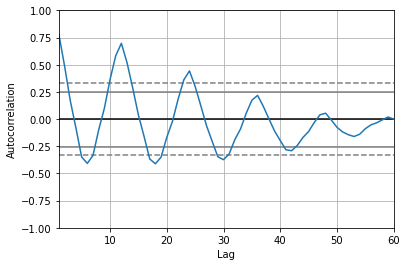

In [191]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(monthly['sales'])
plt.show()

In [192]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


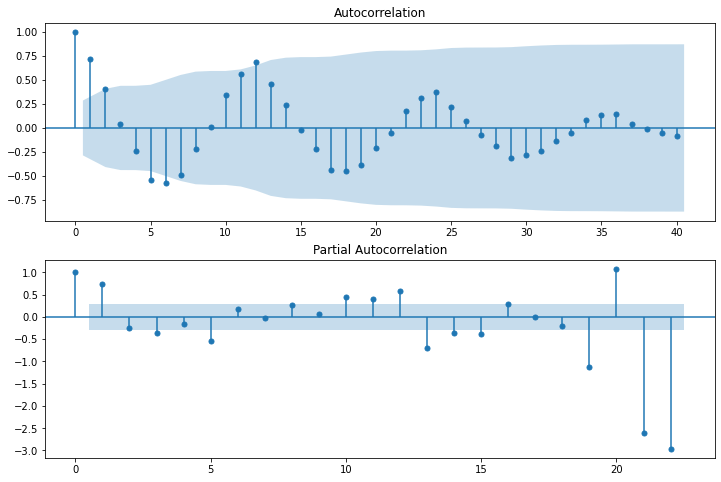

In [193]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(monthly['sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(monthly['sales'].iloc[13:],lags=22,ax=ax2)

# IMPLEMENTING ARIMA MODEL

In [194]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [195]:
am=ARIMA(monthly.sales, order=(1,1,1))
am_model=am.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [196]:
am_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -679.820
Method:                       css-mle   S.D. of innovations          24414.733
Date:                Mon, 14 Nov 2022   AIC                           1367.639
Time:                        18:34:35   BIC                           1375.949
Sample:                    02-28-2013   HQIC                          1370.883
                         - 12-31-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           834.0395   4302.602      0.194      0.846   -7598.905    9266.984
ar.L1.D.sales     0.3939      0.321      1.229      0.219      -0.234       1.022
ma.L1.D.sales    -0.1740      0.326     -0.533      0.594      -0.814       0.466
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5389           +0.0000j            2.5389            0.0000
MA.1            5.7467           +0.0000j            5.7467            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date'>

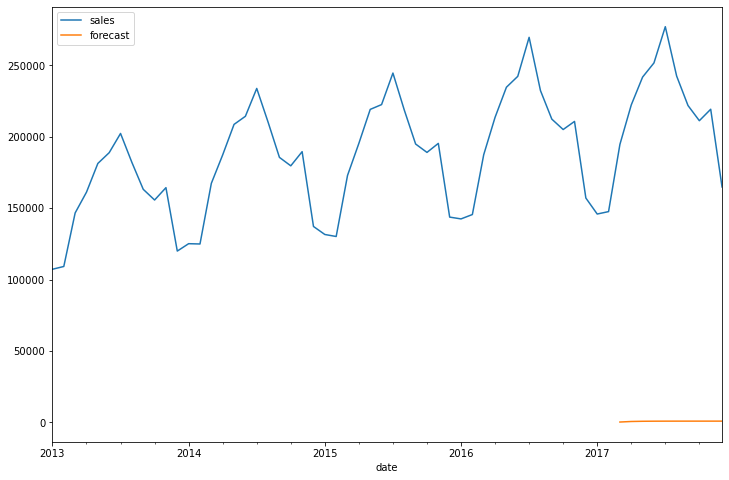

In [197]:
monthly['forecast']=am_model.predict(start=50,end=60,dynamic=True)
monthly[['sales','forecast']].plot(figsize=(12,8))

# APPLYING SARIMAX

In [198]:
import statsmodels.api as sm

In [199]:
sm=sm.tsa.statespace.SARIMAX(monthly['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
sm_model=sm.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='date'>

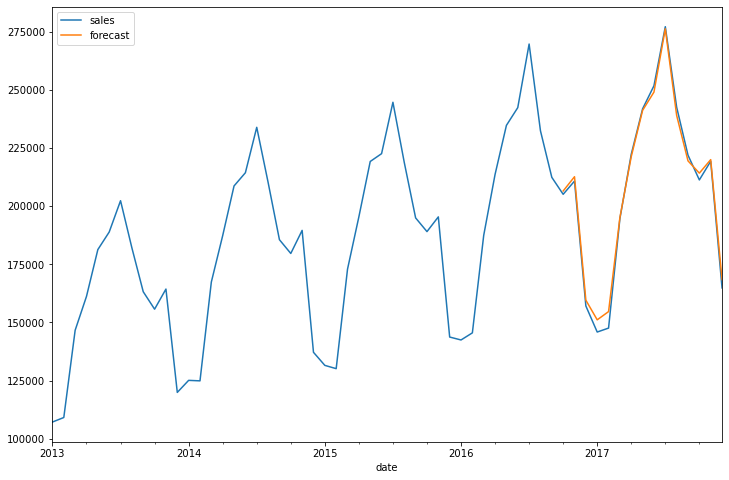

In [200]:
monthly['forecast']=sm_model.predict(start=45,end=60,dynamic=True)
monthly[['sales','forecast']].plot(figsize=(12,8))

# Predicting Future Sales Using SARIMAX

In [201]:
from pandas.tseries.offsets import DateOffset
future_dates=[dsm.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [202]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=monthly.columns)

In [203]:
future_df=pd.concat([monthly,future_datest_df])

<AxesSubplot:>

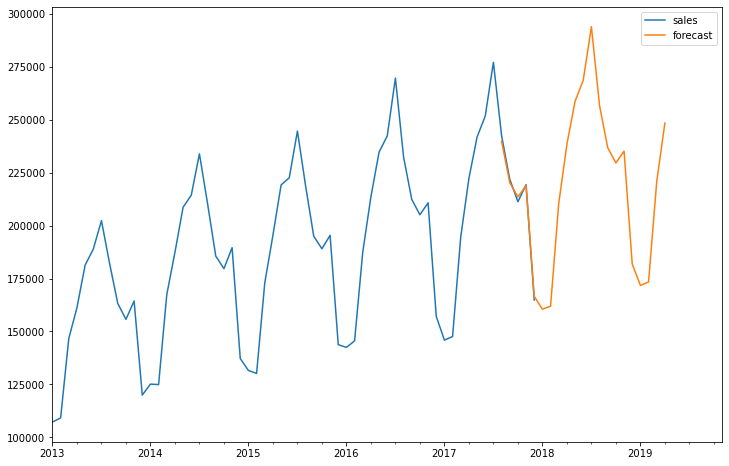

In [204]:
future_df['forecast'] = sm_model.predict(start = 55 , end =75 , dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))